# Data Science Workshop | Web Scraping & Clustering
PS Analytics & Insights
Q3 2020

## Table of Contents
<p id="toc"></p>

   - <a href="#one">Introduction</a>
   - <a href="#two">Web Scraping</a>
   - <a href="#three">K-means Modeling</a> 
   - <a href="#four">Conclusion</a>
   - <a href="#five">PS Data Analytics</a>

<hr style="width:50%;">
    <a id="one" style="font-size:24px;">Introduction:</a>
<p><a href="#toc">Jump to top</a></p>
<p>In this workshop, you will be exposed to the Python programming language, learn how to scrape a public website for data, and model that data in a scientific way that provides valuable insights. We won't go too deep into the math behind the model, or even cover advanced programming techniques. This is a survey crash course into techniques that are readily available to you today, and free of charge :)</p>
<p><strong>A few key concepts before we get started:</strong></p>
<ul>
    <li><strong>Data Science:</strong> an umbrella term, used to define a broad field of automated statistics in the form of models that aide in classifying and predicting outcomes.<sup>1</sup></li>
    <li><strong>Machine Learning:</strong> a branch of artificial intelligence (AI) focused on building applications that learn from data and improve their accuracy over time without being programmed to do so.<sup>2</sup></li>
    <li><strong>HTML:</strong> HTML stands for Hyper Text Markup Language, and is the standard markup language for Web pages. HTML elements are represented by &lt;&gt; tags.<sup>3</sup></li>
    <li><strong>Python:</strong> Python is a popular programming language used for web development (server-side), software development, mathematics, system scripting, etc.<sup>4</sup></li> 
    <li><strong>Anaconda (Navigator):</strong> a desktop graphical user interface (GUI) included that allows you to launch applications and easily manage scripts, packages, environments, and channels using various programming languages.<sup>5</sup></li>
    <li><strong>Jupyter Notebook:</strong> an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text.<sup>6</sup></li>
    <li><strong>Clustering:</strong> Clustering is a set of techniques used to partition data into groups, or clusters. Clusters are loosely defined as groups of data objects that are more similar to other objects in their cluster than they are to data objects in other clusters.<sup>7</sup></li>
    <li><strong>K-Means Clustering:</strong> a method of vector quantization, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.<sup>8</sup></li>
    <li><strong>Web Scraping:</strong> web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites.<sup>9</sup></li>
</ul>
<p><strong>References:</strong></p>
<br>
<div><sup>1</sup><a href="https://towardsdatascience.com/data-science-vs-machine-learning-heres-the-difference-530883d6de3a" target="_blank">https://towardsdatascience.com/data-science-vs-machine-learning-heres-the-difference-530883d6de3a</a>; Accessed November, 2020.</div>
<div><sup>2</sup><a href="https://www.ibm.com/cloud/learn/machine-learning" target="_blank">https://www.ibm.com/cloud/learn/machine-learning</a>; Accessed November, 2020.</div>
<div><sup>3</sup><a href="https://www.w3schools.com/whatis/whatis_html.asp" target="_blank">https://www.w3schools.com/whatis/whatis_html.asp</a>; Accessed November, 2020.</div>
<div><sup>4</sup><a href="https://www.w3schools.com/python/python_intro.asp" target="_blank">https://www.w3schools.com/python/python_intro.asp</a>; Accessed November, 2020.</div>
<div><sup>5</sup><a href="https://docs.anaconda.com/anaconda/navigator/" target="_blank">https://docs.anaconda.com/anaconda/navigator/</a>; Accessed November, 2020.</div>
<div><sup>6</sup><a href="https://jupyter.org/" target="_blank">https://jupyter.org/</a>; Accessed November, 2020.</div>
<div><sup>7</sup><a href="https://realpython.com/k-means-clustering-python/#how-to-build-a-k-means-clustering-pipeline-in-python" target="_blank">https://realpython.com/k-means-clustering-python/#how-to-build-a-k-means-clustering-pipeline-in-python</a>; Accessed November, 2020.</div>
<div><sup>8</sup><a href="https://en.wikipedia.org/wiki/K-means_clustering" target="_blank">https://en.wikipedia.org/wiki/K-means_clustering</a>; Accessed November, 2020.</div>
<div><sup>9</sup><a href="https://en.wikipedia.org/wiki/Web_scraping" target="_blank">https://en.wikipedia.org/wiki/Web_scraping</a>; Accessed November, 2020.</div>



<hr style="width:50%;">
    <a id="two" style="font-size:24px;">Web Scraping:</a>
<p><a href="#toc">Jump to top</a></p>

<p>Let's write your first line of Python code. Simply type your name in the section of the code below, and click the 'Run' button up at the top of the page. Watch with amazement as your name magically appears below :)</p>

In [177]:
print("<Type Your Name Here>")

<Type Your Name Here>


<p>You just wrote your first line of Python code. Now let's get to the fun stuff . . . </p>
<br>
<p style="font-size:20px;"><strong>Step 1:</strong></p>
<p><strong>Define the (business) question you are trying to solve for.</strong></p>
<p>The annual rewards check-in has quickly arrived. Claudia is feeling generous, and a reward has been obtained which will allow for the allocation of funds towards a new automobile. You have honed in on the make of the car you wish to purchase, but you are unclear as to how to pick the right car for you . . . or even group the various vehicles into meaningful groups that you can start to compare.</p>
<p><i>How can I cluster BMW vehicles into comparitive groups, based off of data available to me online?</i></p>
<p style="font-size:20px;"><strong>Step 2:</strong></p>
<p><strong>In order to generate the code needed to complete the task at-hand, we will need to leverage existing libraries of pre-existing code, which contain functions and methods that we will be using.</strong></p>

In [178]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans


# The requests library is the de facto standard for making HTTP requests in Python.
# NumPy is library, adding mathematical support for large, multi-dimensional arrays and matrices.
# Pandas is an open source data analysis and manipulation tool, built on top of the Python programming language.
# BeautifulSoup is a Python library for pulling data out of HTML and XML files.
# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
# seaborn is a data visualization library providing a high-level interface for drawing statistical graphics.
# Scikit-learn is a library featuring various classification, regression and clustering algorithms.

<p style="font-size:20px;"><strong>Step 3:</strong></p>
<p><strong>Identify the source of our data, and define baseline methods and variables.</strong></p>
<br>
<p>For this exercise we are going to leverage Kelley Blue Book's website. Kelley Blue Book is a US-baesd vehicle valuation and automotive research company that is recognized by both consumers and the automotive industry. We want to focus on a very specific automotive maker (BMW), and will be analyzing a list of the available vehicles on the market today <a href="https://www.kbb.com/bmw/" target="_blank">https://www.kbb.com/bmw/</a>.</p>
<img style="width:100%;" src="https://i.imgur.com/EfMiyak.png" title="Kelly Blue Book" />

In [179]:
URL = 'https://www.kbb.com/bmw/'
# Pick our website.
page = requests.get(URL)
# Define our page variable, and leverage the get method from the Requests library to pull in the HTML from the web.
soup = BeautifulSoup(page.content, 'html.parser')
# Define a variable that will allow us to parse through our HTML
car_list = []
# Define a blank list where we will store our data.

<p style="font-size:20px;"><strong>Step 4:</strong></p>
<p><strong>Preview our data:</strong></p>
<i>Click into the line of code below and click the 'Run' button up at the top of the page.</i>

In [180]:
print(soup)


<!DOCTYPE html>

<html lang="en">
<head prefix="og: http://ogp.me/ns#">
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta charset="utf-8"/><script type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"e150c23afa","applicationID":"123678167,97445382","transactionName":"ZFFVNUoAWUVXUUBRXF0bejd7TnpXXVd3V11HRlgNVARFGX9cUF1L","queueTime":0,"applicationTime":905,"agent":"","atts":""}</script><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"e150c23afa",applicationID:"123678167"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports)}return t[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(e,t,n){function r(){}function i(e,t,n){return function(){return o(e,

<p><strong>That is a lot of code :) Let&#39;s use the Inspect Element capability in our browsers to target a specific piece of data.</strong></p>

<img style="width:100%;" src="https://i.imgur.com/WJV1Q0T.png" title="Inspect Element" />

<p style="font-size:20px;"><strong>Step 5:</strong></p>
<p><strong>Let&#39;s see if we can capture every instance of a car that appears on the page, and preview that data.</strong></p>

In [181]:
car_elems = soup.findAll("div", {"class": "results-row js-results-row"})
print(car_elems)

[<div class="results-row js-results-row" data-vehicle-id="447960">
<div class="result-header">
<a class="js-ymm-link result-ymm-title js-sponsored-url" data-append-url="" href="/bmw/2-series/">
<h3 class="title-three">
				2020 BMW 2 Series
			</h3>
</a>
</div>
<div class="result-container">
<div class="result-container-left">
<a class="image-container js-image-container js-sponsored-url" data-append-url="" href="/bmw/2-series/">
<img alt="2020 BMW 2 Series" class="vehicle-image js-hidden-image" data-src="https://file.kelleybluebookimages.com/kbb/base/evox/CP/14343/2020-BMW-2%20Series-front_14343_032_2400x1800_300.png"/>
</a>
<div class="result-info">
<div class="info-section">
<p class="paragraph-three info-title">Starting Price</p>
<span class="title-four">$38,495</span>
</div>
<div class="info-section">
<p class="paragraph-three info-title">Combined Fuel Economy</p>
<span class="title-four js-mpg">27 MPG</span>
</div>
<div>
<p class="paragraph-three title info-title">KBB.com Expert 

<p style="font-size:20px;"><strong>Step 6:</strong></p>
<p><strong>Let&#39;s build a list of cars and associated attributes. Always account for errors in the HTML code, as we have zero control over how this website was architected. Using the Try/Except method allows for the code to continue running when a specific element we're targeting is unavailable.</strong></p>

In [182]:
for car in car_elems:
    try:
        car_id = car["data-vehicle-id"]
    except:
        car_id = 0
    try:
        car_name = car.find("h3", class_="title-three").text.strip()
    except:
        car_name = "N/A"
    try:
        car_price = int(car.find("span", class_="title-four").text.replace('$','').replace(',',''))
    except:
        car_price = 0
    try:
        car_mileage = int(car.find("span", class_="title-four js-mpg").text.replace(' MPG','').replace(' MPGe',''))
    except:
        car_mileage = 0
    try:
        car_rating = float(car.find("span", class_="title-four rating-of-five").find('strong').text)
    except:
        car_rating = 0
    row = car_id, car_name, car_price, car_mileage, car_rating
    car_list.append(row)

<p><strong>Let&#39;s preview that list we just created.</strong></p>

In [183]:
print(car_list)

[('447960', '2020 BMW 2 Series', 38495, 27, 4.5), ('444576', '2020 BMW 3 Series', 41745, 30, 4.6), ('447374', '2020 BMW 4 Series', 45745, 27, 4.1), ('448150', '2020 BMW 5 Series', 54895, 28, 4.6), ('444118', '2019 BMW 6 Series', 71295, 23, 3.7), ('443721', '2020 BMW 7 Series', 87445, 24, 0), ('448155', '2020 BMW 8 Series', 109895, 20, 0), ('436528', '2019 BMW M5', 104695, 17, 4.6), ('438784', '2019 BMW M6', 122195, 16, 0), ('446998', '2020 BMW X1', 36195, 27, 4.5), ('447090', '2020 BMW X2', 37395, 27, 4.6), ('445718', '2020 BMW X3', 42945, 27, 4.4), ('448025', '2020 BMW X3 M', 70895, 16, 4.4), ('446949', '2020 BMW X4', 52095, 25, 3.6), ('444894', '2020 BMW X5', 59895, 0, 4.8), ('447567', '2020 BMW X6', 65295, 23, 4.0), ('436592', '2019 BMW X6 M', 106695, 16, 4.0), ('444998', '2020 BMW X7', 74895, 22, 4.2), ('446998', '2020 BMW X1', 36195, 27, 4.5), ('447090', '2020 BMW X2', 37395, 27, 4.6), ('445718', '2020 BMW X3', 42945, 27, 4.4), ('448025', '2020 BMW X3 M', 70895, 16, 4.4), ('446949

<p style="font-size:20px;"><strong>Step 7:</strong></p>
<p><strong>Let&#39;s convert this list into a DataFrame, so this is a little bit easier on the eyes, and preview the results.</strong></p>

In [184]:
cars = pd.DataFrame(car_list, columns = ["Id","Car","Price","Mileage","Rating"])
cars.head()

,Id,Car,Price,Mileage,Rating
0,447960,2020 BMW 2 Series,38495,27,4.5
1,444576,2020 BMW 3 Series,41745,30,4.6
2,447374,2020 BMW 4 Series,45745,27,4.1
3,448150,2020 BMW 5 Series,54895,28,4.6
4,444118,2019 BMW 6 Series,71295,23,3.7


<p style="font-size:20px;"><strong>Step 8:</strong></p>
<p><strong>The data is starting to look somewhat meaningful. Let's explore the data visually to look for anomolies, and determine what variables we want to leverage to build out our clustering algorithm.</strong></p>

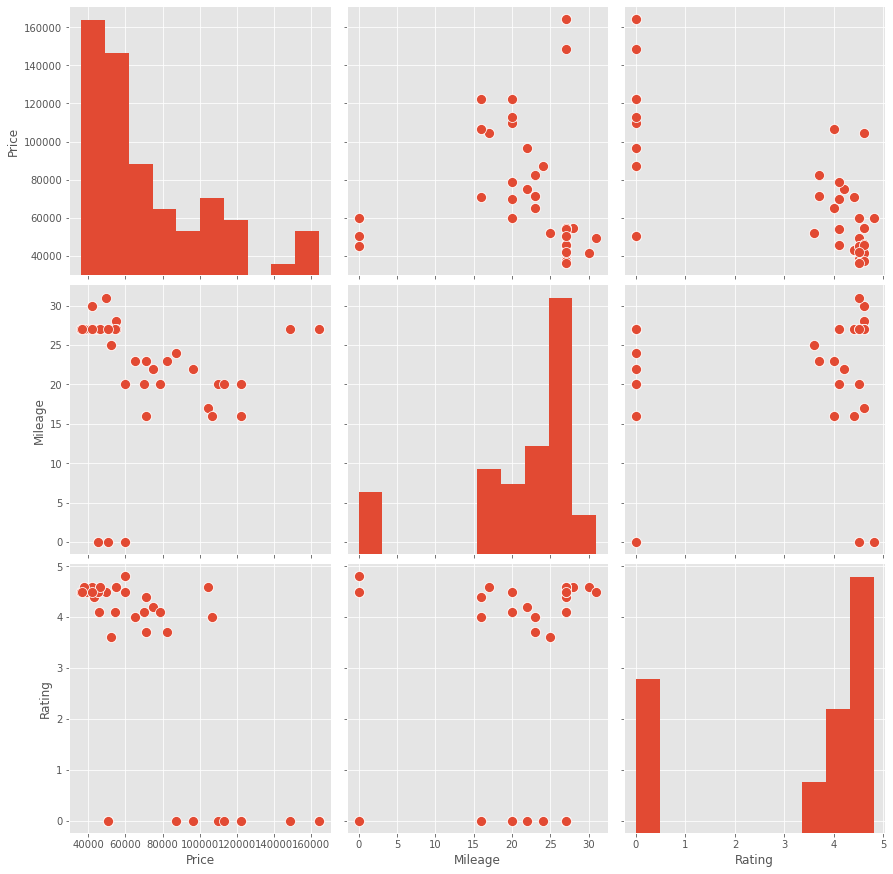

In [185]:
sb.pairplot(cars, vars = ["Price","Mileage","Rating"], height=4, plot_kws={"s": 100})

<p style="font-size:20px;"><strong>Step 9:</strong></p>
<p><strong>When we look at the pairplot details (a pairwise grid of relationships between variables), we can make a few observations:</strong>
    <ul>
        <li>There are quite a few ratings that are missing, and the data is heavily grouped between 4 and 5 . . . not a lot of variance in that data, and not sure this is going to help us create clusters of cars to compare.</li>
        <li>When looking at the relationship between mileage and price, there looks to be a loose negative correlation, this may provide enough meaningful data to leverage for our clustering <i>and</i> there are only a few anomolies in the data we'll want to extract (those with no mileage reported).</li>
    </ul>
</p>
<p><strong>Let&#39;s de-dupe our data, remove a few anomolies, and create a column to tag SUV's and Non-SUV's (we know that any model with an 'X' in it, is considered to be an SUV).</strong></p>

In [186]:
# Row count of our data
index = cars.index
number_of_rows = len(index)
print(number_of_rows)

80


In [187]:
# Row count of our data after de-duping
cars = cars.drop_duplicates()
index = cars.index
number_of_rows = len(index)
print(number_of_rows)

38


In [188]:
# Row count of our data after dropping rows where Mileage = 0
cars = cars[cars.Mileage != 0]
index = cars.index
number_of_rows = len(index)
print(number_of_rows)

35


In [189]:
# Let's view the data we have so far
cars["SUV"] = np.where(cars["Car"].str.contains("X"),1,0)
cars

,Id,Car,Price,Mileage,Rating,SUV
0,447960,2020 BMW 2 Series,38495,27,4.5,0
1,444576,2020 BMW 3 Series,41745,30,4.6,0
2,447374,2020 BMW 4 Series,45745,27,4.1,0
3,448150,2020 BMW 5 Series,54895,28,4.6,0
4,444118,2019 BMW 6 Series,71295,23,3.7,0
5,443721,2020 BMW 7 Series,87445,24,0.0,0
6,448155,2020 BMW 8 Series,109895,20,0.0,0
7,436528,2019 BMW M5,104695,17,4.6,0
8,438784,2019 BMW M6,122195,16,0.0,0
9,446998,2020 BMW X1,36195,27,4.5,1


<p style="font-size:20px;"><strong>Step 10:</strong></p>
<p><strong>Let&#39;s visualize the data and apply a few labels, so we can see what we're working with.</strong>

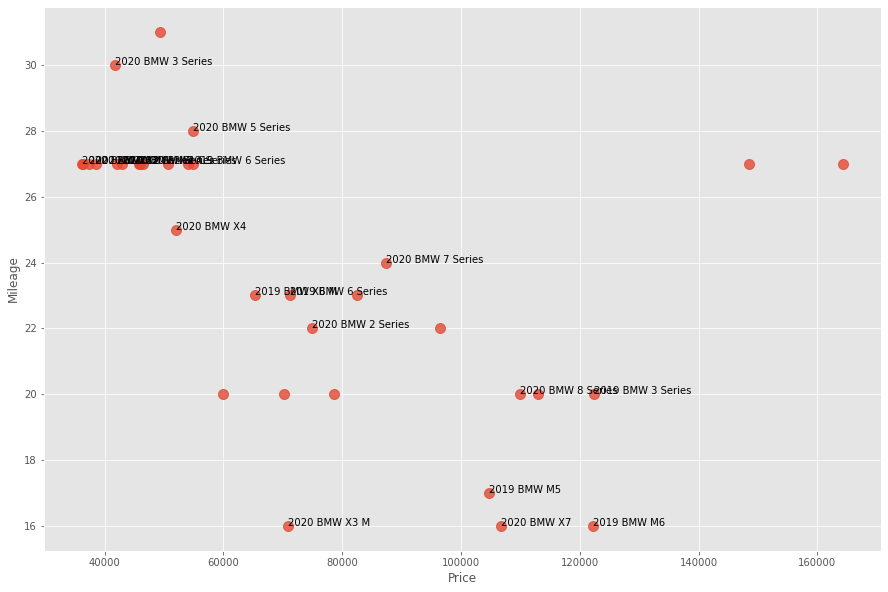

In [190]:
# Let's view the data with the associated Car labels.
plt.figure(figsize = (15,10))
ax = sb.regplot(data=cars, x="Price", y="Mileage", fit_reg=False, marker="o", scatter_kws={'s':100})
for i, txt in enumerate(cars.Car):
    try:
        ax.annotate(txt, (cars.Price[i], cars.Mileage[i]))
    except:
        continue

plt.show()

<hr style="width:50%;">
    <a id="three" style="font-size:24px;">K-Means Cluster Modeling:</a>
<p><a href="#toc">Jump to top</a></p>

<p><strong>Model Background:</strong></p>
<p>Let&#39;s revisit the concept of clustering. Clustering is a machine learning method used to identify two specific qualities of data; its <i>meaningfulness</i> and its <i>usefulness</i>. Meaningful clusters expand on domain knowledge, while useful clusters can refine a data pipeline (think medical treatment candidates and customer segmentation). K-means is one of the most common clustering algorithms available. It is considered to be an 'unsupervised' and partitional type of modeling, because the labels or groups that will be applied to each data point are unknown and no item can be associated with more than one cluster.</p>
<p><strong>Steps to Execute the Algorithm:</strong></p>
<ul>
    <li>Specify the number of clusters you wish to group your data by.</li>
    <li>Centroids (arithmetic mean) are the center points that a cluster will group around, and are selected at random by the algorithm.</li>
    <li>Each point is assigned to it's closest centroid, based off of the sum of the squared Euclidean distance between those two points.</li>
    <li>We wish to minimize this value as best we can by reassigning the centroid, and recalulcatging the SSE, until we achieve the lowest possible value.</li>
<li>The algorithm is nondeterministic, meaning you will achieve different results if you run the algorithm more than once.</li>
</ul></p>
<br>
<div style="width:50%; float:left; text-align: center;"><p></p>
<img src="https://i.imgur.com/fHg82Vw.png" title="The Math"/></div><div style="width:40%; float:left; text-align: center;"><img src="https://files.realpython.com/media/centroids_iterations.247379590275.gif" title="Clustering"/></div>
<div style="width:10%;">&nbsp;</div>
<br>
<p><strong>References:</strong></p>
<br>
<div><a href="https://towardsdatascience.com/data-science-vs-machine-learning-heres-the-difference-530883d6de3a" target="_blank">https://towardsdatascience.com/data-science-vs-machine-learning-heres-the-difference-530883d6de3a</a>; Accessed November, 2020.</div>
<div><a href="https://realpython.com/k-means-clustering-python/#how-to-build-a-k-means-clustering-pipeline-in-python" target="_blank">https://realpython.com/k-means-clustering-python/#how-to-build-a-k-means-clustering-pipeline-in-python</a>; Accessed November, 2020.</div>

<p style="font-size:20px;"><strong>Step 1:</strong></p>
<p><strong>Let's create a seperate data structure that we will use for our clustering. This structure will be known as an array, which contains Price and Mileage.</strong></p>

In [191]:
# Let's create the cluster array and preview the results.
cluster = cars[["Price","Mileage"]]
print(cluster.values[:, 0])

[ 38495  41745  45745  54895  71295  87445 109895 104695 122195  36195
  37395  42945  70895  52095  65295 106695  74895  42095  54095 122395
 164295  59895  78645  50695  54895  96545  49295  36295  45945  82495
 112895 148495  70145  46395  45995]


In [192]:
print(cluster.values[:, 1])

[27 30 27 28 23 24 20 17 16 27 27 27 16 25 23 16 22 27 27 20 27 20 20 27
 27 22 31 27 27 23 20 27 20 27 27]


<p style="font-size:20px;"><strong>Step 2:</strong></p>
<p><strong>Building the Model (the <i>easier</i> part):</strong></p>

In [193]:
# Define the model variables and execute the model
# Additional details on the model can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
km = KMeans(
    n_clusters=3, # the number of clusters we want
    init='random', # how we initialize the model; using obvservations at random to define our centroids
    n_init=10, # the number of time the model will run
    max_iter=300, # maximum number of iterations to be run
    tol=1e-04, # tolerance of convergence . . . meaning the assignments of clusters no longer change
    random_state=0 #random number generation for centroid initialization
)
y_km = km.fit_predict(cluster.values)

<p style="font-size:20px;"><strong>Step 3:</strong></p>
<p><strong>Let's Plot our Results:</strong></p>

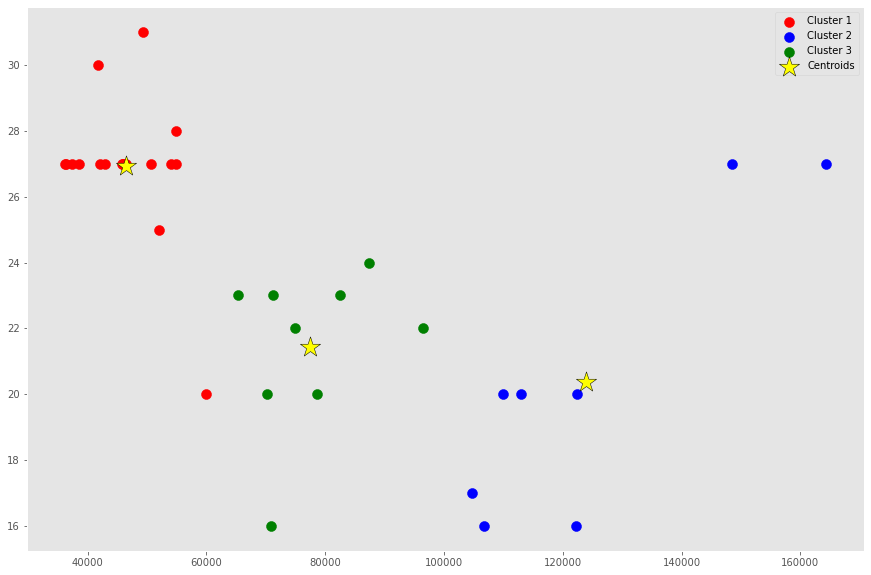

In [194]:
# Set the size of the chart
plt.figure(figsize = (15,10))

# Plot the 3 clusters
plt.scatter(
    cluster.values[y_km == 0, 0], cluster.values[y_km == 0, 1],
    s=100, c='red',
    marker='o',
    label='Cluster 1'
)

plt.scatter(
    cluster.values[y_km == 1, 0], cluster.values[y_km == 1, 1],
    s=100, c='blue',
    marker='o',
    label='Cluster 2'
)

plt.scatter(
    cluster.values[y_km == 2, 0], cluster.values[y_km == 2, 1],
    s=100, c='green',
    marker='o',
    label='Cluster 3'
)

# Plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=450, marker='*',
    c='yellow', edgecolor='black',
    label='Centroids'
)

# View the chart
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

<p>Let's View our Data Again:</p>

In [195]:
cars.sort_values("Price", ascending=False)

,Id,Car,Price,Mileage,Rating,SUV
35,436301,2019 BMW i8,164295,27,0.0,0
64,436318,2019 BMW i8,148495,27,0.0,0
33,443578,2019 BMW 8 Series,122395,20,0.0,0
8,438784,2019 BMW M6,122195,16,0.0,0
63,443607,2019 BMW 8 Series,112895,20,0.0,0
6,448155,2020 BMW 8 Series,109895,20,0.0,0
16,436592,2019 BMW X6 M,106695,16,4.0,1
7,436528,2019 BMW M5,104695,17,4.6,0
51,443679,2020 BMW 7 Series,96545,22,0.0,0
5,443721,2020 BMW 7 Series,87445,24,0.0,0


<p style="font-size:20px;"><strong>Step 4:</strong></p>
<p><strong>Let's Re-Run our Model and Pick 4 Centroids:</strong></p>

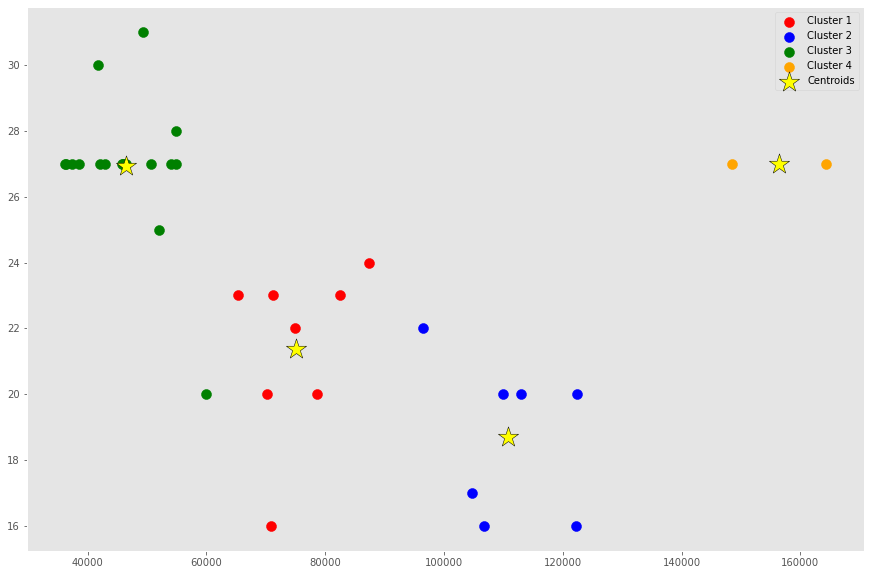

In [196]:
km = KMeans(
    n_clusters=4,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
y_km = km.fit_predict(cluster.values)

plt.figure(figsize = (15,10))

plt.scatter(
    cluster.values[y_km == 0, 0], cluster.values[y_km == 0, 1],
    s=100, c='red',
    marker='o',
    label='Cluster 1'
)

plt.scatter(
    cluster.values[y_km == 1, 0], cluster.values[y_km == 1, 1],
    s=100, c='blue',
    marker='o',
    label='Cluster 2'
)

plt.scatter(
    cluster.values[y_km == 2, 0], cluster.values[y_km == 2, 1],
    s=100, c='green',
    marker='o',
    label='Cluster 3'
)

plt.scatter(
    cluster.values[y_km == 3, 0], cluster.values[y_km == 3, 1],
    s=100, c='orange',
    marker='o',
    label='Cluster 4'
)

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=450, marker='*',
    c='yellow', edgecolor='black',
    label='Centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

<p style="font-size:20px;"><strong>Step 5:</strong></p>
<p><strong>Let's Validate Our Model:</strong></p>
<p>The biggest downside of the K-Means modeling algorithm, is that you select the number of clusters (<i>k</i>) prior to determining the optimal value for <i>k</i>. Sometimes it is obvious as to how many clusters are ideal, but with higher dimensional data this isn't always that clear. Remember our goal here is to reduce the SSE value, by increasing the number of clusters. As <i>k</i> increases, our within cluster SSE (also called "distortion") should decrease as each observation is closer to the centroid.</p>
<p>The elbow method below is a visual tool that allows us to identify the optimal number of clusters, where the distortion will decrease most rapidly.</p>

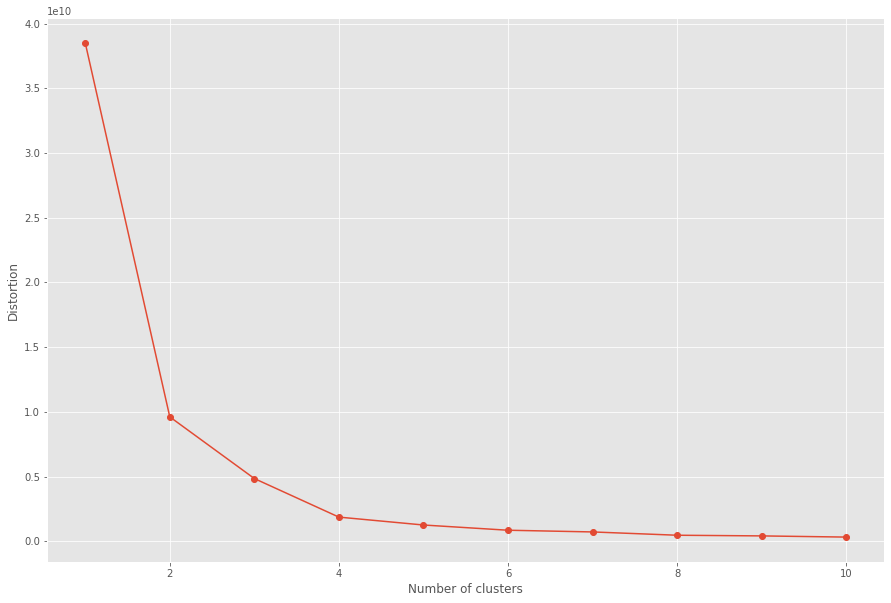

In [197]:
# Let's calculate the distortion for a range of the number of clusters
distortions = []

# Loop through each cluster value with the same parameters we leveraged in our modeling
for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        init='random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=0
    )
    km.fit(cluster.values)
    distortions.append(km.inertia_)

# Plot our data
plt.figure(figsize = (15,10))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

<hr style="width:50%;">
    <a id="four" style="font-size:24px;">Conclusion:</a>
<p><a href="#toc">Jump to top</a></p>

<p>So what have we done in this workshop . . . well, quite a lot :).</p>
<p><strong>Let's recap:</strong></p>
<ul>
    <li>Identified the distinction between Data Science and Machine Learning.</li>
    <li>Wrote your first Python snippet.</li>
    <li>Learned how to pull raw data down from a public website.</li>
    <li>Structured raw data available on the web into a consumable format.</li>
    <li>Learned about a mathematical method to group data points together.</li>
    <li>Learned how to validate a Machine Learning model.</li>
</ul>
<p>But did we ultimately answer our original (business) question???</p>
<p><i>How can I cluster BMW vehicles into comparitive groups, based off of data available to me online?</i></p>
<p><strong>ABSOLUTELY</strong></p>

<img style="width:50%;" src="https://i.ebayimg.com/images/g/ubMAAOSwXyBcVngY/s-l400.jpg" title="Anaconda" />

<hr style="width:50%;">
    <a id="five" style="font-size:24px;">PS Data Analytics Team:</a>
<p><a href="#toc">Jump to top</a></p>

<img style="width:100%;" src="https://i.imgur.com/SAK2gwe.png" title="Org Chart" />
<img style="width:100%;" src="https://i.imgur.com/yVmMKGE.png" title="Data Science Service Offering" />